In [3]:
import pandas as pd
import numpy as np

#Disaster data
disaster_data = pd.read_csv('C:\\Users\\axscat\\Documents\\GitHub\\DisasterPrediction\\Dataset\\FEMA\\DisasterDeclarationsSummaries.csv')

disaster_data.head()

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,tribalRequest,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,lastIAFilingDate,lastRefresh,hash,id
0,FM-5465-NM,5465,NM,FM,2023-05-10T00:00:00.000Z,2023,Fire,LAS TUSAS FIRE,0,0,...,0,35,33,99033,Mora (County),23050,NaN,2023-05-22T03:41:22.800Z,56e2cdd7de53fd6bd0cbe22cd681d0d87708d0ac,e46df225-24a5-4178-9368-0f1c753f8748
1,FM-5465-NM,5465,NM,FM,2023-05-10T00:00:00.000Z,2023,Fire,LAS TUSAS FIRE,0,0,...,0,35,47,99047,San Miguel (County),23050,NaN,2023-05-22T03:41:22.800Z,33f747f70112aed4df749cfb1dd58f1d50f029ff,c8660535-8995-4187-af20-771b5669d4b7
2,FM-5464-RI,5464,RI,FM,2023-04-14T00:00:00.000Z,2023,Fire,QUEENS RIVER FIRE,0,0,...,0,44,9,99009,"Washington (County)(in (P)MSA 5520,6480)",23042,NaN,2023-05-22T03:41:22.800Z,1111d4d4a33f8a6e4d383ac5bd0e60b9bf142da0,9b9a9d9c-8b03-4049-9b16-a3c0d581556c
3,FM-5463-KS,5463,KS,FM,2023-04-13T00:00:00.000Z,2023,Fire,HADDAM FIRE,0,0,...,0,20,201,99201,Washington (County),23038,NaN,2023-05-22T03:41:22.800Z,78dd55a181f146622eb65835b5d794689d1ea7f2,57d936ce-a0d7-412a-9d78-18aee530c146
4,FM-5462-NE,5462,NE,FM,2023-04-09T00:00:00.000Z,2023,Fire,WACONDA-BEAVER LAKE FIRE COMPLEX,0,0,...,0,31,25,99025,Cass (County),23036,NaN,2023-05-22T03:41:22.800Z,5b35b5912f606a21ff29194317052ac7c2541be8,69325b2c-77cf-493f-8f1a-d5b5a737edf8


In [4]:
# Step 2: Drop unnecessary columns
disaster_data = disaster_data.drop(columns=['femaDeclarationString', 'hash', 'id', 'lastRefresh'])
disaster_data.head()

,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,...,incidentBeginDate,incidentEndDate,disasterCloseoutDate,tribalRequest,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,lastIAFilingDate
0,5465,NM,FM,2023-05-10T00:00:00.000Z,2023,Fire,LAS TUSAS FIRE,0,0,1,...,2023-05-10T00:00:00.000Z,NaN,NaN,0,35,33,99033,Mora (County),23050,NaN
1,5465,NM,FM,2023-05-10T00:00:00.000Z,2023,Fire,LAS TUSAS FIRE,0,0,1,...,2023-05-10T00:00:00.000Z,NaN,NaN,0,35,47,99047,San Miguel (County),23050,NaN
2,5464,RI,FM,2023-04-14T00:00:00.000Z,2023,Fire,QUEENS RIVER FIRE,0,0,1,...,2023-04-14T00:00:00.000Z,2023-04-16T00:00:00.000Z,NaN,0,44,9,99009,"Washington (County)(in (P)MSA 5520,6480)",23042,NaN
3,5463,KS,FM,2023-04-13T00:00:00.000Z,2023,Fire,HADDAM FIRE,0,0,1,...,2023-04-13T00:00:00.000Z,2023-04-16T00:00:00.000Z,NaN,0,20,201,99201,Washington (County),23038,NaN
4,5462,NE,FM,2023-04-09T00:00:00.000Z,2023,Fire,WACONDA-BEAVER LAKE FIRE COMPLEX,0,0,1,...,2023-04-08T00:00:00.000Z,NaN,NaN,0,31,25,99025,Cass (County),23036,NaN


In [5]:
# Step 3: Check for missing values
disaster_data.isnull().sum()

disasterNumber                  0
state                           0
declarationType                 0
declarationDate                 0
fyDeclared                      0
incidentType                    0
declarationTitle                0
ihProgramDeclared               0
iaProgramDeclared               0
paProgramDeclared               0
hmProgramDeclared               0
incidentBeginDate               0
incidentEndDate               605
disasterCloseoutDate        15114
tribalRequest                   0
fipsStateCode                   0
fipsCountyCode                  0
placeCode                       0
designatedArea                  0
declarationRequestNumber        0
lastIAFilingDate            46561
dtype: int64

In [6]:
# Step 4: Handle missing values
import datetime
#disaster_data.drop(['lastIAFilingDate', 'disasterCloseoutDate'], axis=1, inplace=True)

# Fill missing values in 'incidentEndDate' with today's date
today = datetime.datetime.now().isoformat()
disaster_data['incidentEndDate'].fillna(today, inplace=True)

# missing values
disaster_data.isnull().sum()

C:\Users\axscat\AppData\Local\Temp\ipykernel_10324\133444936.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  disaster_data['incidentEndDate'].fillna(today, inplace=True)


disasterNumber                  0
state                           0
declarationType                 0
declarationDate                 0
fyDeclared                      0
incidentType                    0
declarationTitle                0
ihProgramDeclared               0
iaProgramDeclared               0
paProgramDeclared               0
hmProgramDeclared               0
incidentBeginDate               0
incidentEndDate                 0
disasterCloseoutDate        15114
tribalRequest                   0
fipsStateCode                   0
fipsCountyCode                  0
placeCode                       0
designatedArea                  0
declarationRequestNumber        0
lastIAFilingDate            46561
dtype: int64

In [7]:
# Drop 'lastIAFilingDate' and 'disasterCloseoutDate' columns
disaster_data.drop(['lastIAFilingDate', 'disasterCloseoutDate'], axis=1, inplace=True)
disaster_data.isnull().sum()

disasterNumber              0
state                       0
declarationType             0
declarationDate             0
fyDeclared                  0
incidentType                0
declarationTitle            0
ihProgramDeclared           0
iaProgramDeclared           0
paProgramDeclared           0
hmProgramDeclared           0
incidentBeginDate           0
incidentEndDate             0
tribalRequest               0
fipsStateCode               0
fipsCountyCode              0
placeCode                   0
designatedArea              0
declarationRequestNumber    0
dtype: int64

In [15]:
date_columns = ['declarationDate', 'incidentBeginDate', 'incidentEndDate']
for col in date_columns:
    disaster_data[col] = pd.to_datetime(disaster_data[col], errors='coerce', utc=True)

disaster_data.head()

,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,tribalRequest,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber
0,5465,NM,2,2023-05-10 00:00:00+00:00,2023,6,LAS TUSAS FIRE,0,0,1,1,2023-05-10 00:00:00+00:00,2024-03-27 14:42:51.259906+00:00,0,35,33,99033,Mora (County),23050
1,5465,NM,2,2023-05-10 00:00:00+00:00,2023,6,LAS TUSAS FIRE,0,0,1,1,2023-05-10 00:00:00+00:00,2024-03-27 14:42:51.259906+00:00,0,35,47,99047,San Miguel (County),23050
2,5464,RI,2,2023-04-14 00:00:00+00:00,2023,6,QUEENS RIVER FIRE,0,0,1,1,2023-04-14 00:00:00+00:00,NaT,0,44,9,99009,"Washington (County)(in (P)MSA 5520,6480)",23042
3,5463,KS,2,2023-04-13 00:00:00+00:00,2023,6,HADDAM FIRE,0,0,1,1,2023-04-13 00:00:00+00:00,NaT,0,20,201,99201,Washington (County),23038
4,5462,NE,2,2023-04-09 00:00:00+00:00,2023,6,WACONDA-BEAVER LAKE FIRE COMPLEX,0,0,1,1,2023-04-08 00:00:00+00:00,2024-03-27 14:42:51.259906+00:00,0,31,25,99025,Cass (County),23036


In [16]:
from sklearn.preprocessing import LabelEncoder
#Dictonary for encoders
encoders = {}

categorical_columns = ['declarationType', 'incidentType']

# Perform label encoding on the categorical columns
for col in categorical_columns:
    le = LabelEncoder()
    disaster_data[col] = le.fit_transform(disaster_data[col])
    encoders[col] = le  # Save the LabelEncoder

disaster_data.head()

,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,tribalRequest,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber
0,5465,NM,2,2023-05-10 00:00:00+00:00,2023,6,LAS TUSAS FIRE,0,0,1,1,2023-05-10 00:00:00+00:00,2024-03-27 14:42:51.259906+00:00,0,35,33,99033,Mora (County),23050
1,5465,NM,2,2023-05-10 00:00:00+00:00,2023,6,LAS TUSAS FIRE,0,0,1,1,2023-05-10 00:00:00+00:00,2024-03-27 14:42:51.259906+00:00,0,35,47,99047,San Miguel (County),23050
2,5464,RI,2,2023-04-14 00:00:00+00:00,2023,6,QUEENS RIVER FIRE,0,0,1,1,2023-04-14 00:00:00+00:00,NaT,0,44,9,99009,"Washington (County)(in (P)MSA 5520,6480)",23042
3,5463,KS,2,2023-04-13 00:00:00+00:00,2023,6,HADDAM FIRE,0,0,1,1,2023-04-13 00:00:00+00:00,NaT,0,20,201,99201,Washington (County),23038
4,5462,NE,2,2023-04-09 00:00:00+00:00,2023,6,WACONDA-BEAVER LAKE FIRE COMPLEX,0,0,1,1,2023-04-08 00:00:00+00:00,2024-03-27 14:42:51.259906+00:00,0,31,25,99025,Cass (County),23036


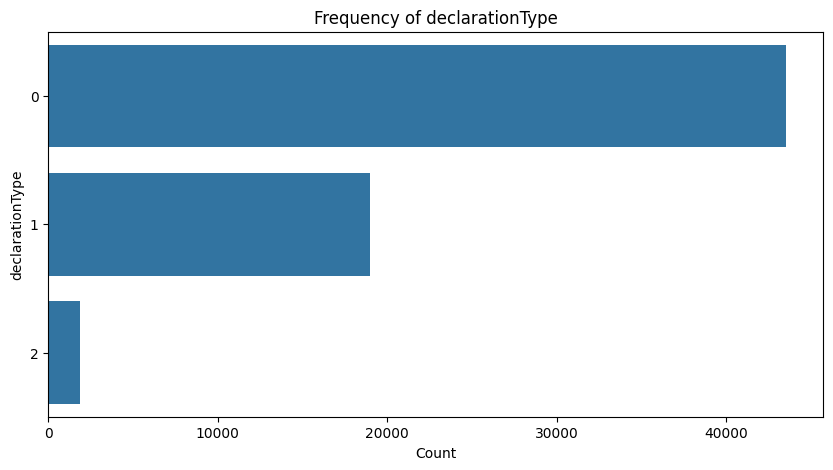

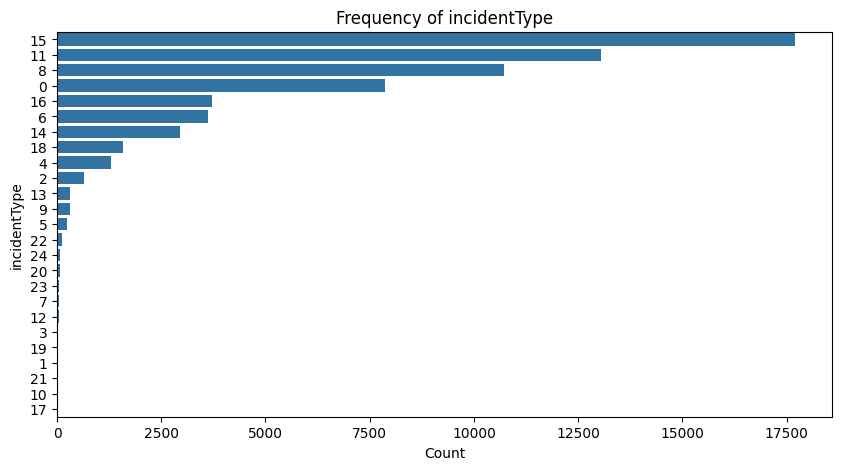

In [17]:
# Visualize frequency
import matplotlib.pyplot as plt
import seaborn as sns

# Create bar plots for categorical variables
for col in categorical_columns:
    plt.figure(figsize=(10,5))
    sns.countplot(data=disaster_data, y=col, order=disaster_data[col].value_counts().index)
    plt.title(f'Frequency of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()


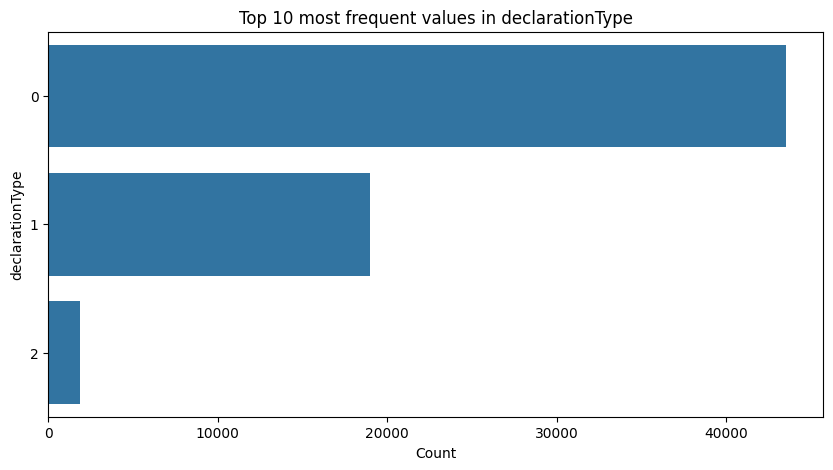

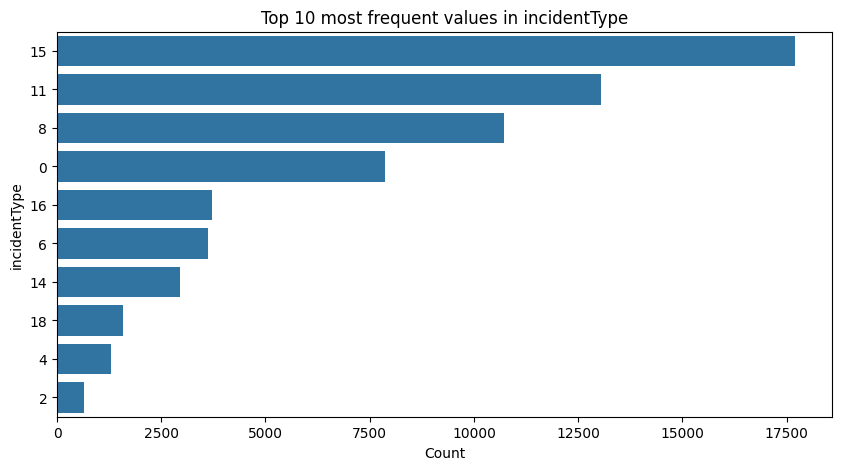

Encoder for declarationType:
Label -> Category
0 -> 0
1 -> 1
2 -> 2


Encoder for incidentType:
Label -> Category
0 -> 0
1 -> 1
2 -> 2
3 -> 3
4 -> 4
5 -> 5
6 -> 6
7 -> 7
8 -> 8
9 -> 9
10 -> 10
11 -> 11
12 -> 12
13 -> 13
14 -> 14
15 -> 15
16 -> 16
17 -> 17
18 -> 18
19 -> 19
20 -> 20
21 -> 21
22 -> 22
23 -> 23
24 -> 24




In [18]:
# Create bar plots for the top 10 most frequent
for col in categorical_columns:
    plt.figure(figsize=(10,5))
    top_10_values = disaster_data[col].value_counts().index[:10]
    top_10_data = disaster_data[disaster_data[col].isin(top_10_values)]
    sns.countplot(data=top_10_data, y=col, order=top_10_values)
    plt.title(f'Top 10 most frequent values in {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

# Display the encoders
for col, encoder in encoders.items():
    print(f'Encoder for {col}:')
    print('Label -> Category')
    for label in range(len(encoder.classes_)):
        print(f'{label} -> {encoder.inverse_transform([label])[0]}')
    print('\n')